In [2]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense,Input,Multiply
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense
import numpy as np
from keras import backend as K
from keras.models import Model
from keras.callbacks import EarlyStopping

In [3]:
train_data = 'Data/train'
test_data = 'Data/test'

In [4]:
img_height, img_width=100,100
epochs = 100
batch_size = 16
nb_train_samples = 2049
nb_validation_samples = 1838

In [5]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        rotation_range=10.,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
# Data generator 

train_generator = train_datagen.flow_from_directory(
        train_data,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical')

Found 2536 images belonging to 10 classes.


In [7]:
test_generator = test_datagen.flow_from_directory(
        test_data,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical')

Found 2636 images belonging to 10 classes.


In [8]:
inputs = Input(shape=(100,100,3))
x = Conv2D(8, kernel_size=(5, 5), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(16, kernel_size=(5, 5), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(32, kernel_size=(5, 5), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(120, activation='relu')(x)
x = Dense(84, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
cnn_model = Model(inputs=inputs,outputs = x)

In [9]:
cnn_model.compile(loss='categorical_crossentropy',
              optimizer = SGD(lr=1e-3,momentum=0.9),#SGD(lr=1e-3,momentum=0.9)
              metrics=['accuracy'])

C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [10]:
cnn_model_history = cnn_model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples// batch_size ,
        epochs=epochs,
        validation_data=test_generator,
        validation_steps=nb_validation_samples// batch_size,
        workers = 4)

C:\Users\admin\AppData\Local\Temp\ipykernel_6624\4186034437.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model_history = cnn_model.fit_generator(


Epoch 1/100
128/128 [==============================] - 33s 247ms/step - loss: 2.1442 - accuracy: 0.2064 - val_loss: 1.8360 - val_accuracy: 0.3350
Epoch 2/100
128/128 [==============================] - 24s 183ms/step - loss: 1.5776 - accuracy: 0.4010 - val_loss: 1.4996 - val_accuracy: 0.4583
Epoch 3/100
128/128 [==============================] - 22s 172ms/step - loss: 1.3604 - accuracy: 0.4613 - val_loss: 1.2219 - val_accuracy: 0.5071
Epoch 4/100
128/128 [==============================] - 22s 172ms/step - loss: 1.0880 - accuracy: 0.5730 - val_loss: 0.8665 - val_accuracy: 0.6689
Epoch 5/100
128/128 [==============================] - 24s 187ms/step - loss: 0.9367 - accuracy: 0.6318 - val_loss: 0.8048 - val_accuracy: 0.6732
Epoch 6/100
128/128 [==============================] - 24s 187ms/step - loss: 0.7480 - accuracy: 0.7191 - val_loss: 0.7018 - val_accuracy: 0.7610
Epoch 7/100
128/128 [==============================] - 24s 183ms/step - loss: 0.7396 - accuracy: 0.7186 - val_loss: 0.7019 -

In [11]:
inputs = Input(shape=(100,100,3))
c = Conv2D(8, kernel_size=(5, 5), activation='relu')(inputs)
p = MaxPooling2D(pool_size=(2, 2))(c)
r1 = Conv2D(16, kernel_size=(5, 5), activation='relu')(p)
r2 = Conv2D(16, kernel_size=(5, 5), activation='relu')(p)
r = Multiply()([r1,r2])
x = MaxPooling2D(pool_size=(2, 2))(r)
x = Conv2D(32, kernel_size=(5, 5), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(120, activation='relu')(x)
x = Dense(84, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
rcnn1_model = Model(inputs=inputs,outputs = x)

In [12]:
rcnn1_model.compile(loss='categorical_crossentropy',
              optimizer = SGD(lr=1e-3,momentum=0.9),#SGD(lr=1e-3,momentum=0.9)
              metrics=['accuracy'])

In [13]:
rcnn1_model_history=rcnn1_model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples// batch_size ,
        epochs=epochs,
        validation_data=test_generator,
        validation_steps=nb_validation_samples// batch_size,
        workers = 4)

Epoch 1/100


C:\Users\admin\AppData\Local\Temp\ipykernel_6624\2507331808.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  rcnn1_model_history=rcnn1_model.fit_generator(


128/128 [==============================] - 33s 250ms/step - loss: 2.2979 - accuracy: 0.1396 - val_loss: 2.2841 - val_accuracy: 0.1963
Epoch 2/100
128/128 [==============================] - 26s 198ms/step - loss: 2.0241 - accuracy: 0.2877 - val_loss: 1.6115 - val_accuracy: 0.3580
Epoch 3/100
128/128 [==============================] - 25s 196ms/step - loss: 1.4753 - accuracy: 0.4475 - val_loss: 1.2385 - val_accuracy: 0.5433
Epoch 4/100
128/128 [==============================] - 29s 223ms/step - loss: 1.1574 - accuracy: 0.5571 - val_loss: 0.9931 - val_accuracy: 0.6184
Epoch 5/100
128/128 [==============================] - 30s 233ms/step - loss: 0.9966 - accuracy: 0.6132 - val_loss: 0.8430 - val_accuracy: 0.6771
Epoch 6/100
128/128 [==============================] - 28s 217ms/step - loss: 0.9092 - accuracy: 0.6569 - val_loss: 0.7853 - val_accuracy: 0.6787
Epoch 7/100
128/128 [==============================] - 30s 234ms/step - loss: 0.7236 - accuracy: 0.7250 - val_loss: 0.7021 - val_accurac

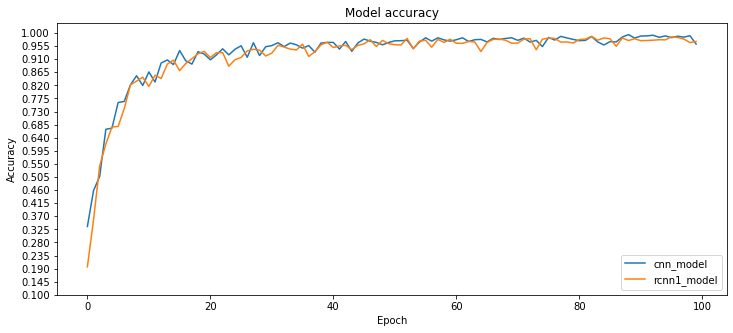

In [17]:
import matplotlib.pyplot as plt
plt.plot(cnn_model_history.history['val_accuracy'])
plt.plot(rcnn1_model_history.history['val_accuracy'])
plt.rcParams['figure.figsize'] = (12.0, 5.0)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['cnn_model', 'rcnn1_model'], loc='lower right')
plt.yticks(np.linspace(0.1, 1, 21))
plt.show()

In [19]:
inputs = Input(shape=(100,100,3))
x = Conv2D(8, kernel_size=(5, 5), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(16, kernel_size=(5, 5), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(32, kernel_size=(5, 5), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(120, activation='relu')(x)
x = Dense(84, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
rnn2_model = Model(inputs=inputs,outputs = x)

In [20]:
rnn2_model.compile(loss='categorical_crossentropy',
              optimizer = SGD(lr=1e-3,momentum=0.9),#SGD(lr=1e-3,momentum=0.9)
              metrics=['accuracy'])

C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [22]:
rnn2_model_history=rnn2_model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples// batch_size ,
        epochs=epochs,
        validation_data=test_generator,
        validation_steps=nb_validation_samples// batch_size,
        workers = 4)

Epoch 1/100


C:\Users\admin\AppData\Local\Temp\ipykernel_6624\2613282812.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  rnn2_model_history=rnn2_model.fit_generator(


128/128 [==============================] - 24s 180ms/step - loss: 2.2419 - accuracy: 0.1833 - val_loss: 1.9831 - val_accuracy: 0.2566
Epoch 2/100
128/128 [==============================] - 21s 165ms/step - loss: 1.6594 - accuracy: 0.3789 - val_loss: 1.4762 - val_accuracy: 0.4068
Epoch 3/100
128/128 [==============================] - 20s 157ms/step - loss: 1.3911 - accuracy: 0.4490 - val_loss: 1.2457 - val_accuracy: 0.5367
Epoch 4/100
128/128 [==============================] - 21s 159ms/step - loss: 1.1976 - accuracy: 0.5176 - val_loss: 1.1669 - val_accuracy: 0.5466
Epoch 5/100
128/128 [==============================] - 20s 157ms/step - loss: 1.0650 - accuracy: 0.5740 - val_loss: 0.9921 - val_accuracy: 0.5998
Epoch 6/100
128/128 [==============================] - 24s 189ms/step - loss: 0.9123 - accuracy: 0.6480 - val_loss: 0.6754 - val_accuracy: 0.7632
Epoch 7/100
128/128 [==============================] - 26s 204ms/step - loss: 0.7470 - accuracy: 0.7134 - val_loss: 0.7233 - val_accurac

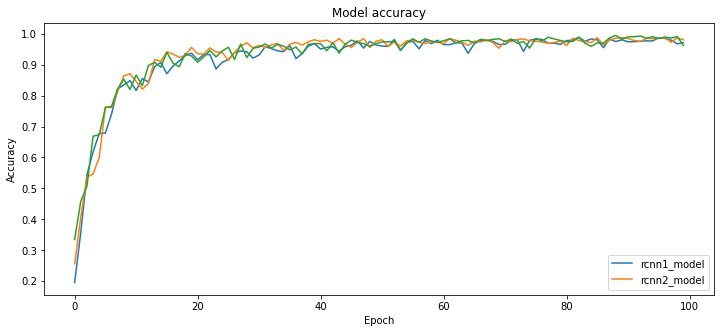

In [23]:
plt.plot(rcnn1_model_history.history['val_accuracy'])
plt.plot(rnn2_model_history.history['val_accuracy'])
plt.plot(cnn_model_history.history['val_accuracy'])
plt.rcParams['figure.figsize'] = (16.0, 10.0)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['rcnn1_model', 'rcnn2_model'], loc='lower right')
plt.show()

In [24]:
len(cnn_model_history.history['val_accuracy'])

100

In [25]:
cnn_model_20=cnn_model_history.history['val_accuracy'][20:100]

In [26]:
rnn1_model_20=rcnn1_model_history.history['val_accuracy'][20:100]
rnn2_model_20=rnn2_model_history.history['val_accuracy'][20:100]

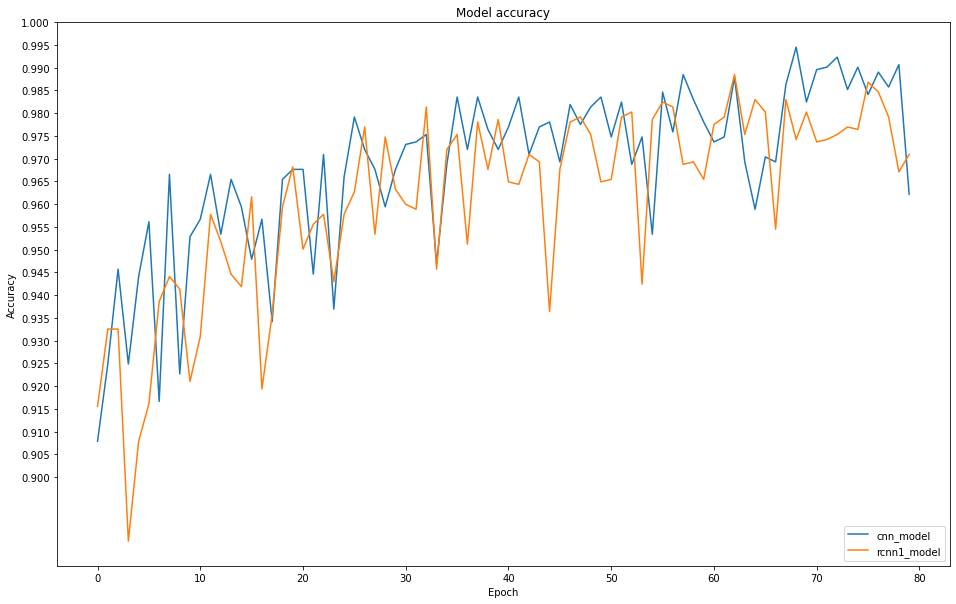

In [27]:
plt.plot(cnn_model_20)
plt.plot(rnn1_model_20)
plt.rcParams['figure.figsize'] = (30.0, 5.0)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['cnn_model', 'rcnn1_model'], loc='lower right')
plt.yticks(np.linspace(0.9, 1, 21))
plt.savefig('./mstar_model.jpg')
plt.show()